# Motivation
Finding datasets for space robotics, especially planetary landscapes, is challenging due to limited accessibility to firsthand data. This dataset aims to fill this gap by offering a labeled lunar landscape dataset for machine learning tasks, eliminating the need for manual labeling.


# How data looks
Below is a side-by-side view of the first image of the dataset (render0001.tif) and its corresponding segmented ground truth (ground0001.tif).


![Render and its ground truth segmentation](https://i.imgur.com/m5ja0BI.png)


From this, we can make a number of observations that should be kept in mind when using this dataset, in decreasing order of importance:

* **3 **(technically 4)** classes are considered: large rocks (in blue), smaller rocks (in green), the sky (in red)** (and everything else, in black)
* **The segmented ground truth is not perfect**. In particular, there are some instances (like above) where a small rock is embedded in a larger rock.

* **The camera used is noise-free, and no data augmentation is performed**. It is up to the user to decide on what data augmentation pipeline they see fit to use, though we recommend that particular attention be paid to **adding sensor noise to renders, especially if the goal is to perform validation test on real lunar images**. An example of such sensor effect augmentation can be found here: https://github.com/alexacarlson/SensorEffectAugmentation.

* **Only rocks measuring more than 10cm are usually represented on the segmented image**. This is to avoid cluttering and focus on rocks that are relevant to detect;

* **Colors go darker for distant rocks**. This is also to keep focus on relevant rocks, which are usually closest to the observer. However, the user is free to set their own threshold to determine whether or not a certain rock should be considered depending on its color intensity (cf. the blue rock). As can be seen from the images below, giving a minimum intensity threshold betweeen 50 and 200 is recommended to avoid noise from distant rocks.

* **Bounding boxes are only drawn around blue rocks of intensity above 150 and dimensions above 20x20 pixels**. This is, again, to only consider rocks that are clearly visible while leaving aside those further away. 


# A test on actual lunar pictures
The dataset contains real lunar images from the Chang'e 3 rover, captured using two different cameras, PCAM and TCAM. Ground truth segmentations were created for these images to assist in evaluating segmentation algorithms. A modified UNet model was tested on the dataset, demonstrating successes in accurately detecting some rocks but also limitations, especially with complex rock shapes and those partially covered by sand. The dataset aims to aid researchers in improving lunar image segmentation.


![Test on real lunar pictures](https://i.imgur.com/7GRUlcS.png)
(from left to right: original picture, ground truth (hand-drawn), segmentation trained with the Artificial Lunar Landscape Dataset.)

Text(0.5, 1.0, 'FIG 1.2 - Filling holes inside larger rocks')

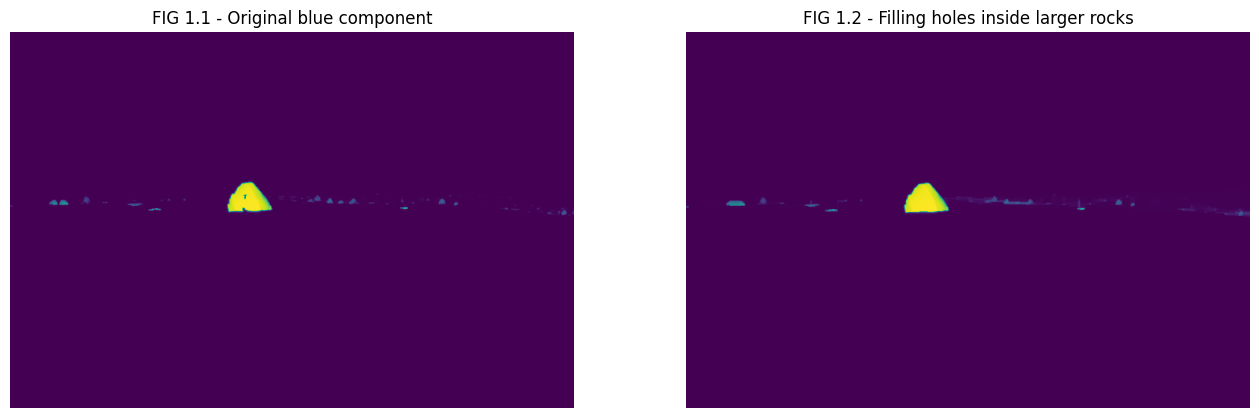

In [4]:
#code to fill holes inside large (blue) rocks

import cv2
import numpy
import matplotlib.pyplot as plt

#loads a segmented image and isolates larger (blue) rocks
ground_truth = numpy.array(cv2.imread("Moon_Dataset\images\ground\ground0001.png"))
data_blue = ground_truth[:,:,0]

#creates a 10x10 kernel so as to close any hole smaller than 10x10 pixels inside blue rocks
kernel = numpy.ones((10,10),numpy.uint8)
closing = cv2.morphologyEx(data_blue, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 2, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(data_blue)
ax[0].set_title('FIG 1.1 - Original blue component')
ax[1].axis('off')
ax[1].imshow(closing)
ax[1].set_title('FIG 1.2 - Filling holes inside larger rocks')

# Using Thresholding 

Loading the Segmented Image: It uses the Python Imaging Library (PIL) to load an image file from the specified path ("Moon_Dataset\images\ground\ground0001.png") and converts it into a numpy array, making it suitable for further processing.

Thresholding for Different Blue Values: It defines four different threshold values (min_blue_value_1, min_blue_value_2, min_blue_value_3, and min_blue_value_4) and creates binary masks (blue_1, blue_2, blue_3, and blue_4) based on these thresholds. Each binary mask highlights regions of the image where the blue channel values exceed the respective threshold.

Displaying the Results: The code then creates a subplot of five images for visualization. It shows the original blue channel (FIG 2.1 - Original blue component) and four additional images (FIG 2.2 to FIG 2.5) where each image corresponds to a different threshold value. These images help visualize how different threshold values affect the identification of large blue rocks in the image.

The purpose of this code is likely to explore the impact of different threshold values on the segmentation of large blue rocks in the image.

Text(0.5, 1.0, 'FIG 2.5 - Threshold = 150')

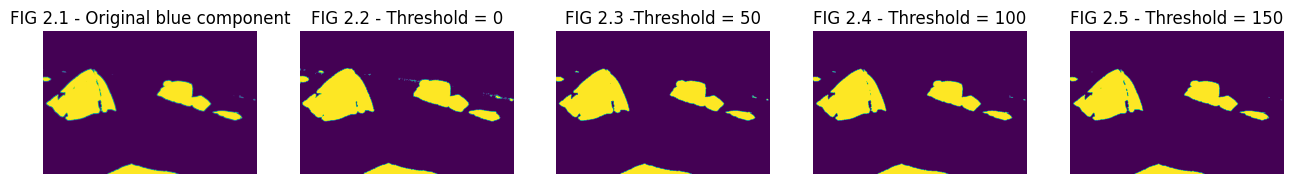

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy

#loads the segmented image and converts it to an array
ground_truth = Image.open("Moon_Dataset\images\ground\ground0015.png")
data = numpy.array(ground_truth)

#defines different thresholds deciding which large (blue) rocks to keep
data_blue = data[:,:,2]
min_blue_value_1 = 0
min_blue_value_2 = 50
min_blue_value_3 = 100
min_blue_value_4 = 150

blue_1 = (data_blue > min_blue_value_1)
blue_2 = (data_blue > min_blue_value_2)
blue_3 = (data_blue > min_blue_value_3)
blue_4 = (data_blue > min_blue_value_4)

fig, ax = plt.subplots(1, 5, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(data_blue)
ax[0].set_title('FIG 2.1 - Original blue component')
ax[1].axis('off')
ax[1].imshow(blue_1)
ax[1].set_title('FIG 2.2 - Threshold = 0')
ax[2].axis('off')
ax[2].imshow(blue_2)
ax[2].set_title('FIG 2.3 -Threshold = 50')
ax[3].axis('off')
ax[3].imshow(blue_3)
ax[3].set_title('FIG 2.4 - Threshold = 100')
ax[4].axis('off')
ax[4].imshow(blue_4)
ax[4].set_title('FIG 2.5 - Threshold = 150')



Text(0.5, 1.0, 'Green component without the smallest rocks')

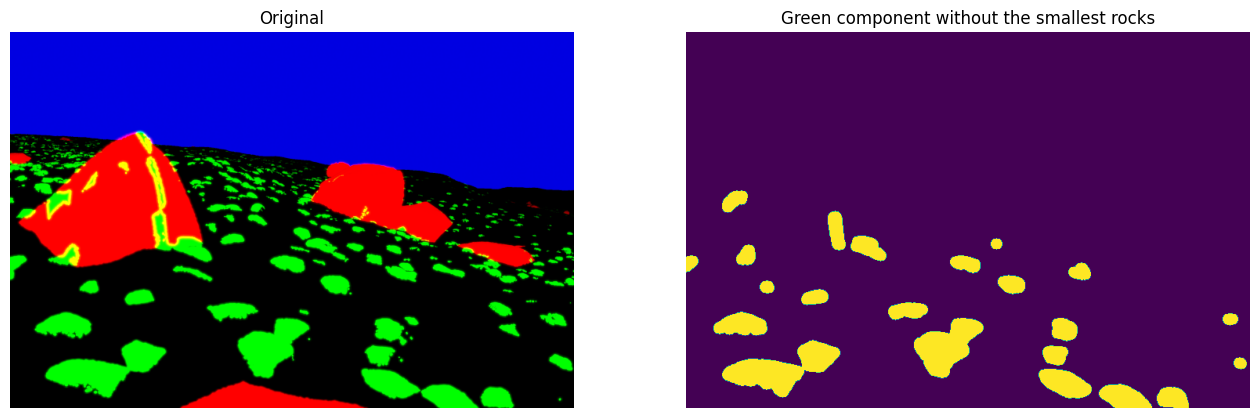

In [22]:
#code snip only keeps the most relevant green rocks

import cv2
import numpy
import matplotlib.pyplot as plt
ground_truth = numpy.array(cv2.imread("Moon_Dataset\images\ground\ground0015.png"))
data = numpy.array(ground_truth)

data_green = data[:,:,1]
min_value = 100
h,w = data_green.shape
for y in range(0, h):
    for x in range(0, w):
        data_green[y, x] = 255 if data_green[y, x] >= min_value else 0
        
kernel = numpy.ones((15,15),numpy.uint8)
kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
opening = cv2.morphologyEx(data_green, cv2.MORPH_OPEN, kernel_circle)
fig, ax = plt.subplots(1, 2, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(ground_truth)
ax[0].set_title('Original')
ax[1].axis('off')
ax[1].imshow(opening)
ax[1].set_title('Green component without the smallest rocks')

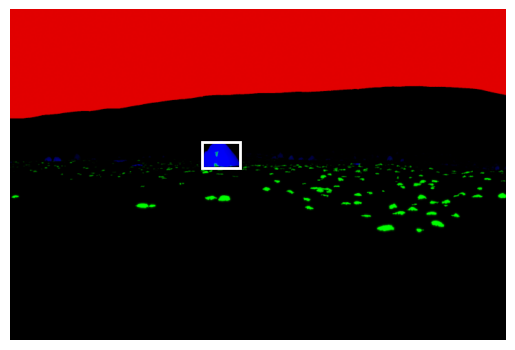

In [1]:
from PIL import Image
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy

#loads the bounding boxes file and extracts those from the first frame
bounding_boxes_list = []
with open(r"Moon_Dataset\bounding_boxes.csv") as bounding_boxes_csv:
    reader = csv.reader(bounding_boxes_csv, delimiter=',')
    next(bounding_boxes_csv) # Skip the header
    for row in reader:
        if row[0] == '1':
            bounding_boxes_list.append(row[1:5])
        else:
            break

#loads the first segmented image and displays its bounding boxes
ground_truth = numpy.array(Image.open(r"Moon_Dataset\images\ground\ground0001.png"))
fig,ax = plt.subplots(1)
ax.axis('off')
ax.imshow(ground_truth)
for  bounding_box in bounding_boxes_list:
    bounding_box = list(map(float, bounding_box)) 
    rect = patches.Rectangle((bounding_box[0]-0.5,bounding_box[1]-0.5),bounding_box[2],bounding_box[3],linewidth=2,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
plt.show()

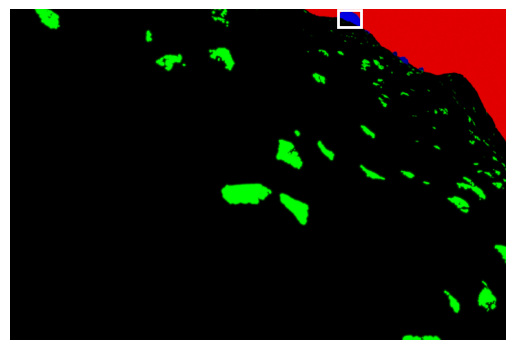

In [31]:
import os

# Function to load and draw bounding boxes on an image
def draw_bounding_boxes(image_filename, bounding_boxes_file):
    # Extract frame number from the image filename
    frame_number = int(os.path.basename(image_filename).split("ground")[1].split(".")[0])

    # Loads the bounding boxes file and extracts those for the specified frame
    bounding_boxes_list = []
    with open(bounding_boxes_file) as bounding_boxes_csv:
        reader = csv.reader(bounding_boxes_csv, delimiter=',')
        next(bounding_boxes_csv)  # Skip the header
        for row in reader:
            if int(row[0]) == frame_number:
                bounding_boxes_list.append(row[1:5])

    # Loads the segmented image
    image = numpy.array(Image.open(image_filename))
    fig, ax = plt.subplots(1)
    ax.axis('off')
    ax.imshow(image)

    # Draw bounding boxes on the image
    for bounding_box in bounding_boxes_list:
        bounding_box = list(map(float, bounding_box))
        rect = patches.Rectangle(
            (bounding_box[0] - 0.5, bounding_box[1] - 0.5),
            bounding_box[2],
            bounding_box[3],
            linewidth=2,
            edgecolor='w',
            facecolor='none'
        )
        ax.add_patch(rect)

    plt.show()

# Specify the image filename and bounding boxes file for the desired frame
image_filename = os.path.join("Moon_Dataset", "images", "ground", "ground0035.png")
bounding_boxes_file = os.path.join("Moon_Dataset", "bounding_boxes.csv")

# Call the function to draw bounding boxes on the image
draw_bounding_boxes(image_filename, bounding_boxes_file)


# Technical information
* Render dimensions: 720x480 pixels
* Camera FOV: 65° 
* Camera film aperture: 36x24mm
* Camera focal length: ~20mm
* Camera orientation: Yaw between 0° and 360°; Pitch between -30° and 0° (so as to limit the portion of images occupied by the sky); Roll between -20° and 20°
* Sun elevation: Random, uniform distribution between 20° and 40° for 75% of frames, between 40° and 50° for 25% of frames
* Sun heading: Random, uniform distribution between 0° and 360°
